# Noise filtering
## This notebook outlines the concepts behind filtering noise in audio signal

### Steps
- Create a combined noisy signal
    - Create a Sine wave (Original signal)
    - Create a noise signal
- Compute frequencies
- Filter the frequencies
- Recover the signal from the filtered frequencies
- Plot the original (recovered / noise filtered) signal Vs Noisy signal

### Import the libraries

In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Set the parameters for the signals
- signal frequency
- noise frequency
- number of samples
- sampling rate

In [4]:
frequency = 1000
noisy_freq = 50
num_samples = 48000
sampling_rate = 48000.0

### Create the original signal

In [5]:
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]

### Create the noise

In [6]:
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]

### Convert them to numpy arrays

In [7]:
sine_wave = np.array(sine_wave)
sine_noise = np.array(sine_noise)

### Create the combined Noisy Signal

In [8]:
combined_signal = sine_wave + sine_noise

### Plot the Original and Noisy signal

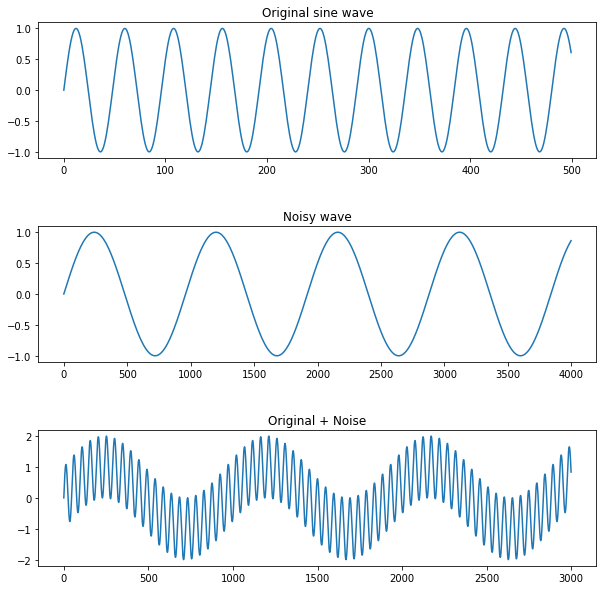

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title("Original sine wave")
 
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:4000])
 
plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:3000])
 
plt.show()

### Compute frequencies

In [10]:
data_fft = np.fft.fft(combined_signal)

In [11]:
freq = (np.abs(data_fft[:len(data_fft)]))

### Filtered frequency

In [12]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

### Plot Frequecies of Original Vs Filtered Signal

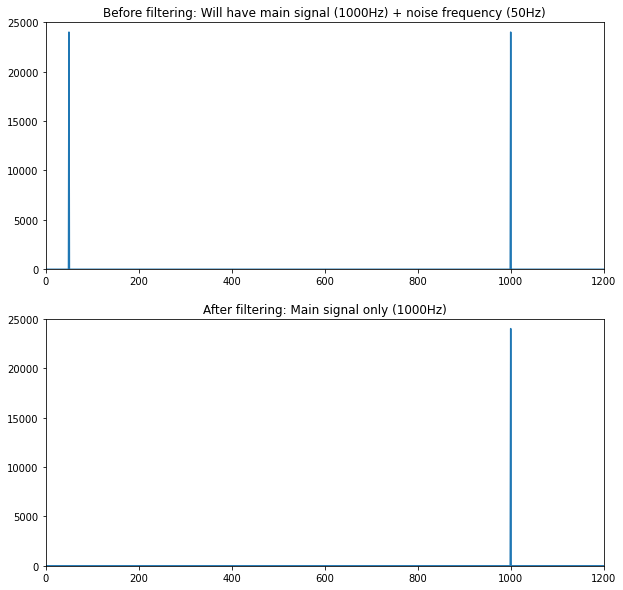

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(freq)
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
plt.xlim(0,1200)
plt.ylim(0, 25000)

plt.subplot(2,1,2)
plt.plot(filtered_freq) 
plt.title("After filtering: Main signal only (1000Hz)")
plt.xlim(0,1200)
plt.ylim(0, 25000)

plt.show()
 
plt.close()

### Recovered Signal
- Use Inverse Fourier Transform

In [14]:
recovered_signal = np.fft.ifft(filtered_freq)

### Plot Original Vs Noisy Vs Recovered Signal

/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


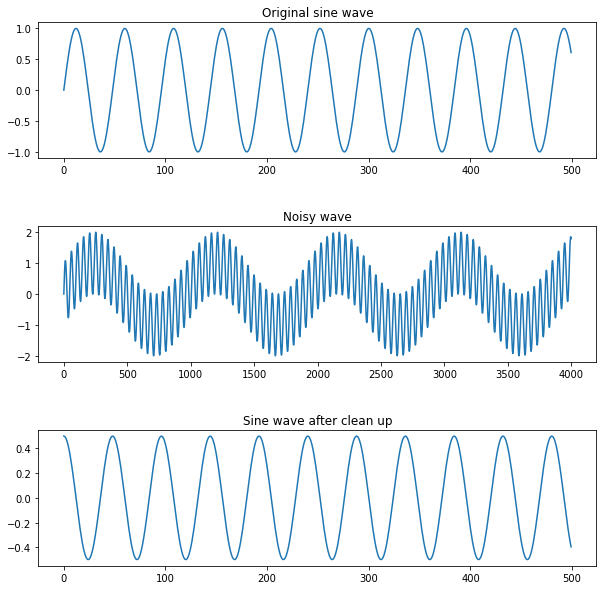

In [15]:
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
plt.title("Original sine wave")

plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
 
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(combined_signal[:4000])
 
plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))
 
plt.show()